# In this lesson we calculate and plot both band structure and dos for Bi2Se3

In [1]:
from siman import header
from siman.SSHTools import SSHTools
from siman.calc_manage import add_loop, res_loop
from siman.database import write_database, read_database
from siman.set_functions import read_vasp_sets
from siman.dos_functions import plot_dos
from siman.bands import plot_bands
%matplotlib inline
read_database() # read database if exist
header.PATH2PROJECT    = 'topologic' # path to project relative to your home folder on cluster
header.PATH2POTENTIALS = '/home/aksenov/scientific_projects/PAW_PBE_VASP' #path to VASP POTENTIALS
header.varset['static'].potdir = {83:'Bi_pv', 34:'Se'} #subfolders with required potentials
header.ssh_object = SSHTools()
header.ssh_object.setup(user="aksenov",host="10.30.16.62",pkey="/home/aksenov/.ssh/id_rsa")

/home/aksenov/simanrc.py was read


In [2]:
#Creating new sets for DOS and Bands
dos_pack = {'NSW':0, 'LORBIT':11, 
            'ISMEAR':-5, 'LAECHG':'.TRUE.', 
            'EMIN':-10, 'EMAX':14, 
            'NEDOS':2000, 'KSPACING':0.15, 
            'savefile':'d'}
read_vasp_sets([('dos', 'static',dos_pack, 'override')]) #new set 'dos' from 'static'

band_pack = {'ICHARG':11, 'LORBIT':11, 
             'k_band_structure':[40, ('G', 0, 0, 0), ('Z', 0.5, 0.5, 0.5), 
                                 ('F', 0.5, 0.5, 0), ('G', 0, 0, 0), ('L', 0, 0.5, 0)]
}
read_vasp_sets([('band', 'static', band_pack, 'override')]) #new set 'band' from static


Attention! You have chosen to override set dos
 

Warning! You did not change  NSW  in dos set
 


Attention! You have chosen to override set band
 



{'static': <set_functions.InputSet at 0x7ffba5803828>,
 'band': <set_functions.InputSet at 0x7ffba5814470>,
 'dos': <set_functions.InputSet at 0x7ffba2ed4f28>}

In [4]:
#calculate charge density
add_loop('Bi2Se3.rho', 'static', 1, input_geo_file = 'in/Bi2Se3_mp-541837_computed.POSCAR', it_folder = 'Bi2Se3', run = 0)


command: pwd
-- You provided the following geo file explicitly  in/Bi2Se3_mp-541837_computed.POSCAR ; Version of file does not matter, I use *curver*= 1 as a new version 

-- check_kpoints(): Kpoint   mesh is:  [8, 8, 8] 

-- check_kpoints(): The actual k-spacings are  [ 0.22  0.22  0.22] 

-- Attention! ngkpt =  [8, 8, 8]  is adopted from struct_des which you provided for it  Bi2Se3.rho  and kspacing =  0.235 

command:  mkdir -p /home/aksenov/topologic/Bi2Se3//Bi2Se3.rho.static/
command: chmod +x /home/aksenov/topologic/Bi2Se3//Bi2Se3.rho.static/Bi2Se3.rho.static.run

Calculation ('Bi2Se3.rho', 'static', 1) successfully created

 



'Bi2Se3.rho'

In [5]:
res_loop('Bi2Se3.rho', 'static', 1)

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- Bi2Se3.rho.static.1           |  -20.1543  |    10.27;10.27;10.27    |  -680,-680,-657    |   1,13, 13    


(['Bi2Se3.rho.static.1           |  -20.1543  |    10.27;10.27;10.27    |  -680,-680,-657    |   1,13, 13   '],
 [])

In [3]:
#inherit charge density and make non-selfconsistent calculation of band structure
add_loop('Bi2Se3.rho', 'static', 1, ise_new = 'band', inherit_option = 'full', savefile = 'ocx', override = 1, run = 1)

-- Warning! File ./Bi2Se3/Bi2Se3.rho.if/Bi2Se3.rho.if.inherit.full.1.geo was replaced 

-- File xyz/Bi2Se3.rho.static.1.end.xyz was written 

-- inherit_ngkpt(): the k-grid from Bi2Se3.rho was inherited to Bi2Se3.rho.if 

-- check_kpoints(): Kpoint   mesh is:  [8, 8, 8] 

-- check_kpoints(): The actual k-spacings are  [ 0.22  0.22  0.22] 

-- Writing k-points file for band structure calculation. 


Calculation ('Bi2Se3.rho.if', 'band', 1) successfully created

 

-- Coping CHGCAR for band structure 

-- cp /home/aksenov/topologic/Bi2Se3//Bi2Se3.rho.static/1.CHGCAR.gz /home/aksenov/topologic/Bi2Se3//Bi2Se3.rho.if.band///CHGCAR.gz; gunzip -f /home/aksenov/topologic/Bi2Se3//Bi2Se3.rho.if.band///CHGCAR.gz 

Submitted batch job 78109
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
             78109       AMG Bi2Se3.r  aksenov PD       0:00      1 (None) 

-- To read results use  res_loop('Bi2Se3.rho.if', ['band'], [1], show = 'fo'  )     # , on 2016-12-

'Bi2Se3.rho.if'

In [4]:
#calculate dos
add_loop('Bi2Se3.rho', 'dos', 1, savefile = 'ocx', input_geo_file = 'Bi2Se3_mp-541837_computed.POSCAR', it_folder = 'Bi2Se3', run = 1)

-- You provided the following geo file explicitly  Bi2Se3_mp-541837_computed.POSCAR ; Version of file does not matter, I use *curver*= 1 as a new version 

-- check_kpoints(): Kpoint   mesh is:  [12, 12, 12] 

-- check_kpoints(): The actual k-spacings are  [ 0.15  0.15  0.15] 

-- Attention! ngkpt =  [12, 12, 12]  is adopted from struct_des which you provided for it  Bi2Se3.rho  and kspacing =  0.15 


Calculation ('Bi2Se3.rho', 'dos', 1) successfully created

 

Submitted batch job 78110
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
             78110       AMG Bi2Se3.r  aksenov PD       0:00      1 (None)
             78109       AMG Bi2Se3.r  aksenov  R       0:09      1 node-amg01 

-- To read results use  res_loop('Bi2Se3.rho', ['dos'], [1], show = 'fo'  )     # , on 2016-12-13   ; possible options for show: fit, fo, fop, en, mag, magp, smag, maga, occ, occ1, mep, mepp 



'Bi2Se3.rho'

In [13]:
#read results, download xml files
res_loop('Bi2Se3.rho.if', 'band', 1,  up = 'x')
res_loop('Bi2Se3.rho',    'dos',  1,  up = 'x')

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- Bi2Se3.rho.if.band.1          |  -12.1562  |    10.27;10.27;10.27    | 21327,21908,1574   |   1,11, 11    
-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- Bi2Se3.rho.dos.1              |  -20.1559  |    10.27;10.27;10.27    |  -687,-688,-649    |   1,13, 13    


(['Bi2Se3.rho.dos.1              |  -20.1559  |    10.27;10.27;10.27    |  -687,-688,-649    |   1,13, 13   '],
 [])

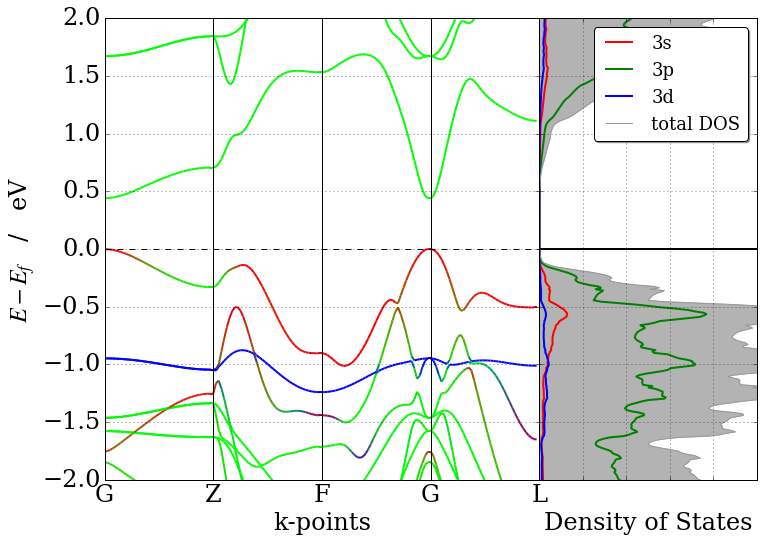

In [12]:
#plot bands and dos using xml files
plot_bands(vasprun_dos   = 'Bi2Se3/Bi2Se3.rho.dos/1.vasprun.xml', 
           vasprun_bands = 'Bi2Se3/Bi2Se3.rho.if.band/1.vasprun.xml',
           kpoints       = 'Bi2Se3/Bi2Se3.rho.if.band/KPOINTS',
           element = 'Bi',
           ylim = (-2,2))